In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
df = pd.read_csv('Test.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


/home/itcom/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_MRP'>

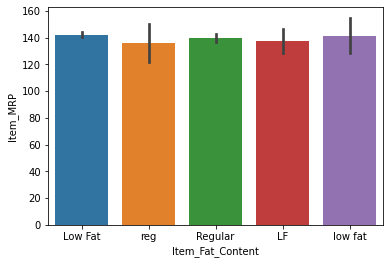

In [4]:
sns.barplot(df['Item_Fat_Content'],df['Item_MRP'])

In [9]:
item=[]
for i in df['Item_Type'].unique():
    item.append(len(i))

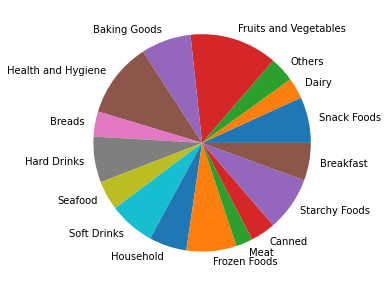

In [22]:
plt.subplots(figsize=(5,5))
plt.pie(item,labels = df['Item_Type'].unique());
#plt.legend(loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

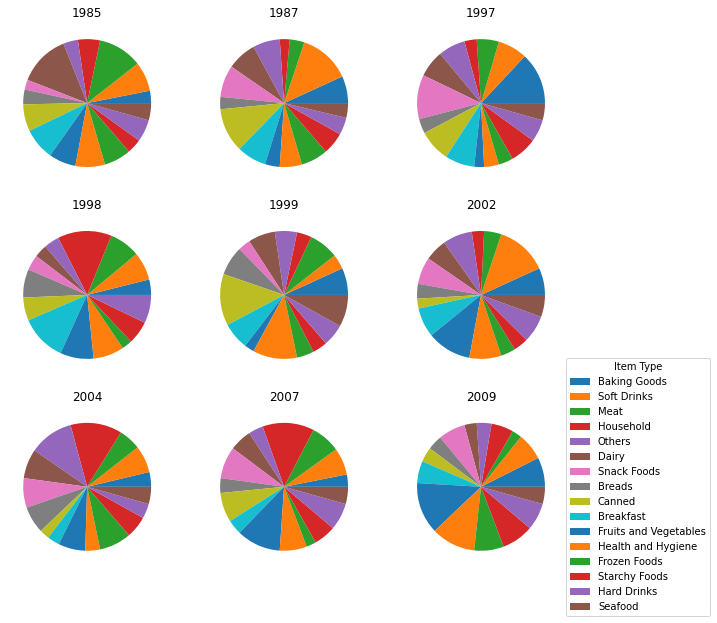

In [14]:
date=df['Outlet_Establishment_Year'].sort_values()
fig,axes= plt.subplots(3,3,figsize=(10,10))
for i,ax in zip(date.unique(),axes.ravel()):
    data= df[df['Outlet_Establishment_Year']==i]
    item=[]
    for k in data['Item_Type'].unique():
        item.append(len(k))   
    ax.pie(item);
    ax.set_title(f'{i}') 
ax.legend(data['Item_Type'].unique(),title="Item Type",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [6]:
df.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
dtype: bool

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [15]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [16]:
df['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [17]:
df['Outlet_Size'].fillna('Medium',inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [19]:
df=df.drop(columns=['Item_Identifier','Outlet_Identifier'])

In [20]:
oe = OrdinalEncoder()
columns=['Item_Fat_Content','Item_Type','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']
df[columns] = oe.fit_transform(df[columns])

# Item_MRP

In [21]:
scaler = StandardScaler()
xp=df.drop(columns=['Item_MRP'])
y = df['Item_MRP']
X = scaler.fit_transform(xp)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

#### RandomForestRegressor

In [22]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=200,max_depth=100,random_state=0)
rfr.fit(X_train,y_train)
print('train score:',rfr.score(X_train,y_train))
print('test score:',rfr.score(X_test,y_test))

train score: 0.9176496643436374
test score: 0.4065397068419755


# Item_Fat_Content

In [23]:
xf=df.drop(columns=['Item_Fat_Content'])
yf = df['Item_Fat_Content']
Xf = scaler.fit_transform(xf)
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf,yf,random_state=0)

#### RandomForestClassifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestRegressor(n_estimators=200,max_depth=100,random_state=0)
rfc.fit(Xf_train,yf_train)
y_pr = rfc.predict(Xf_test)
print('train score:',rfc.score(Xf_train,yf_train))
print('test score:',rfc.score(Xf_test,yf_test))

train score: 0.9117426129156444
test score: 0.3145847166676804


## Model comparison

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [47]:
models=[('LR',LogisticRegression()),('RFC',RandomForestClassifier()),
        ('KNC',KNeighborsClassifier()),('GNB',GaussianNB()),('svc',SVC())]
results = []
names = []
for name,model in models:
    kfold = StratifiedKFold(n_splits=5,random_state =1,shuffle=True)
    scores = cross_val_score(model,Xf,yf,cv=kfold,scoring='accuracy')
    results.append(scores)
    names.append(name)
    print(name,scores.mean(),scores.std())

LR 0.6051771712066595 0.006254862905433164
RFC 0.7049791271817358 0.007166803706862691
KNC 0.5731370854856491 0.01129834489418462
GNB 0.6013060995701562 0.010407316308864442
svc 0.5991914105565672 0.005499373220817804


Text(0.5, 1.0, 'comparison of models')

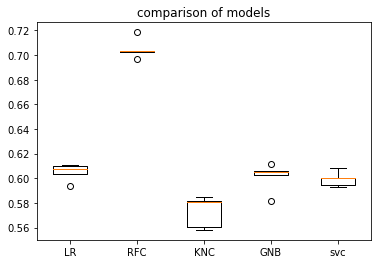

In [50]:
plt.boxplot(results,labels=names);
plt.title('comparison of models')